<div style="padding: 20px;
            color: white;
            margin: 10px;
            font-size: 200%;
            text-align: center;
            display: flex;
            align-items: center;
            justify-content: center;
            border-radius: 20px;
            background-color: #5D3830;
            overflow: hidden;
            font-weight: bold;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
            Mall Customers Segmentation
</div>

- **Annual Income (k$)** : It is an annual income of how many thousand dollars
- **Spending score** : typically refers to a metric used in customer segmentation and marketing. It's often associated with businesses that want to understand their customers' purchasing behavior and habits. The spending score is a numerical value assigned to each customer, reflecting how much they spend on a particular product or at a specific store.
- **Dataset Link** : https://www.kaggle.com/datasets/shwetabh123/mall-customers/data

### `1. Import libraries.`

In [44]:
## main Libraries
import numpy as np
import pandas as pd

## Vis. Libraries
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot

## preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder ## Standardization

## meric
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

## Clusering model
from sklearn.cluster import KMeans

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## setting some Libraries
sns.set(rc={"figure.figsize" : [12,8]}, font_scale=1.2 , style='darkgrid')
pio.templates.default = "ggplot2"
init_notebook_mode(connected=True)

### `2. Reading the Dataset and Take Overview.`

In [45]:
df = pd.read_csv("Mall_Customers.csv") ## read data

In [46]:
df.sample(5) ## take sample from data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
10,11,Male,67,19,14
193,194,Female,38,113,91
53,54,Male,59,43,60
151,152,Male,39,78,88
76,77,Female,45,54,53


In [47]:
df.shape ## show the num. of cols and rows

(200, 5)

**Statistics Info. about the Data**

In [48]:
df.describe(include="number") ## include numerical cols

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [49]:
df.describe(exclude="number") ## include categorical cols

,Gender
count,200
unique,2
top,Female
freq,112


In [50]:
df.info() ## some information about the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
df.isna().any() ## check missing values

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

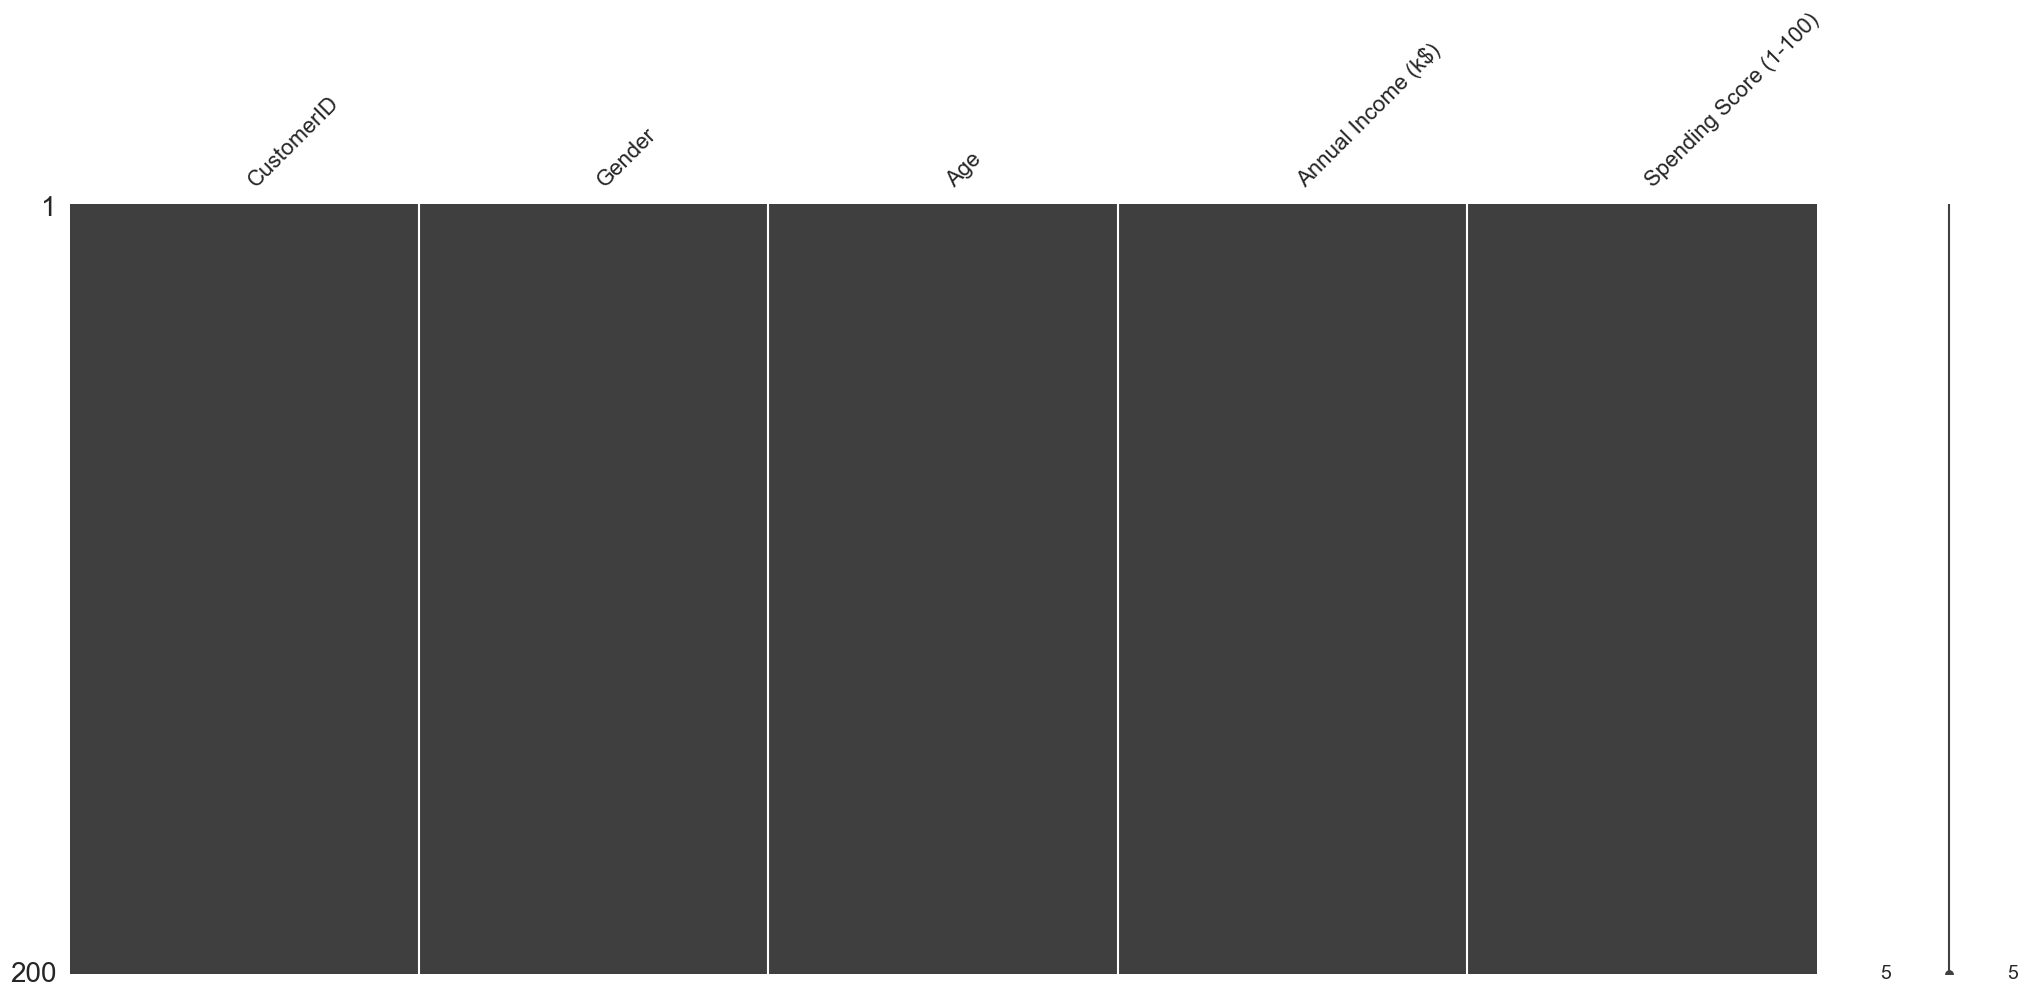

In [52]:
msno.matrix(df)
plt.show()

In [53]:
df.duplicated().any() ## check duplicated values in data

False

- **The data consists of 200 rows and 5 columns.**
- **The mean age of customers is equal to 38.85.**
- **The mean income of customers is equal to 60.56.**
- **No Missing Values in Data.**
- **No Duplicate Values in Data.**

### `3. Exploratory Data Analysis (EDA)`
- refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables.

### `3.1 Uni-variate Analysis`

In [54]:
## df.columns = df.columns.str.replace(" ","_") ## replace space in columns name to _

In [55]:
df.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [56]:
df["CustomerID"].nunique() ## number of unique values in columns

200

In [57]:
df.drop(columns=["CustomerID"], axis=1, inplace=True) ## delete column from data

`Gender Column`

In [58]:
gender_count = df["Gender"].value_counts(normalize=True)
gender_count.to_frame()

,Gender
Female,0.56
Male,0.44


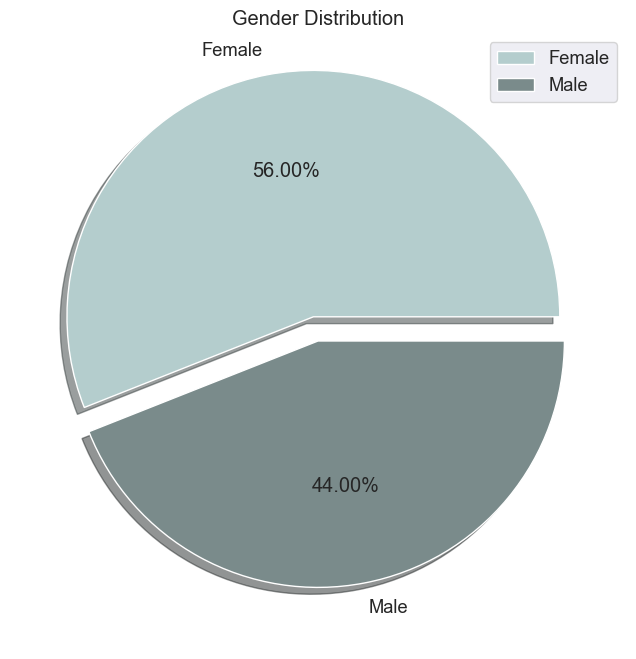

In [59]:
## colors for each gender category
colors = ['#B4CDCD', '#7A8B8B']

## explode values to emphasize a specific section
explode = (0.1, 0)

## labels and autopct to show percentage with two decimal places
labels = gender_count.index
autopct = '%.2f%%'

plt.pie(x=gender_count.values, 
        labels=labels,
        colors=colors,
        explode=explode,
        autopct=autopct,
        shadow=True)

# title to the chart
plt.title("Gender Distribution")

# Add a legend
plt.legend(loc='best')

plt.show()

**Percentage of female customers: 65%**

`Age`

In [60]:
df["Age"].describe().to_frame()

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


In [61]:
fig = px.box(data_frame=df, x="Age",
             color_discrete_sequence= px.colors.qualitative.Antique_r,
             title="<b>age distribution.".title())

# Customize the layout
fig.update_layout(xaxis_title="Age",
                    font=dict(
                        family="Courier New, monospace",
                        size=14,
                        color="black"))
fig.show()

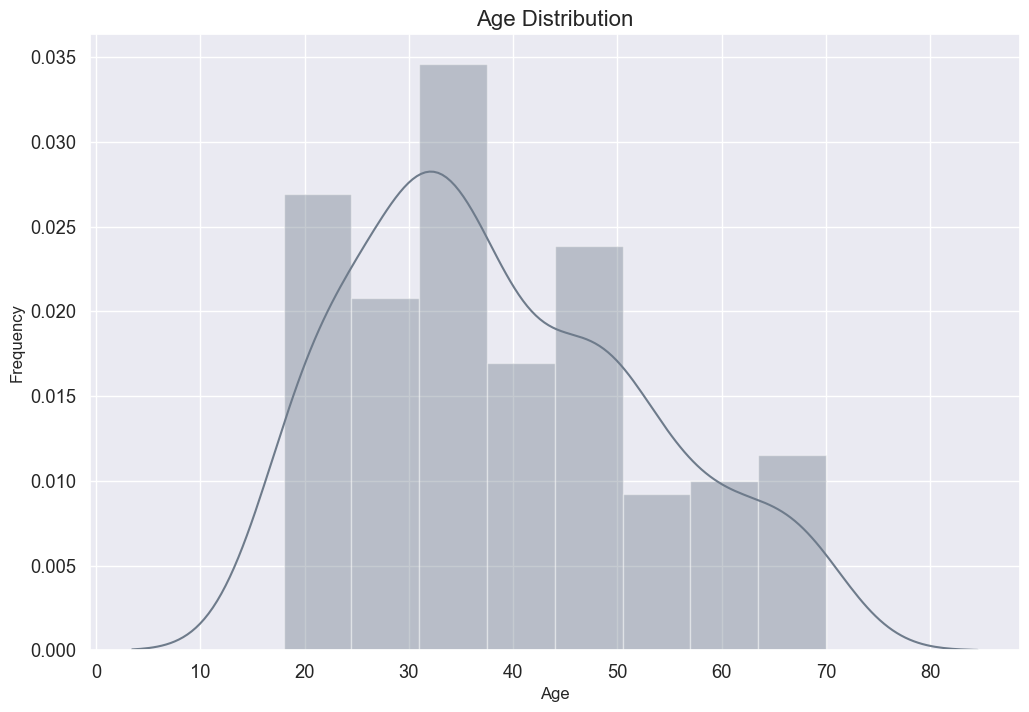

In [62]:
# Create the distribution plot
sns.distplot(df["Age"], kde=True, color="#6E7B8B")

# Customize the title and axes labels
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

- **No outliers in Age column.**
- **As seen in the chart: right-skewed distribution in age and the mean is greater than the median**

`Annual Income (k$)`

In [63]:
df["Annual Income (k$)"].describe().to_frame()

,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


In [64]:
fig = px.histogram(data_frame=df, x="Annual Income (k$)", marginal="violin",
             color_discrete_sequence= px.colors.qualitative.Antique_r,
             title="<b>Annual Income distribution.".title())

# Customize the layout
fig.update_layout(xaxis_title="Annual Income (k$)",
                    font=dict(
                        family="Courier New, monospace",
                        size=14,
                        color="black"))


fig.show()

In [65]:
## replace outliers with median value 
df.loc[df["Annual Income (k$)"]>130, "Annual Income (k$)"] = df["Annual Income (k$)"].median()

In [66]:
df[df["Annual Income (k$)"]>130]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


**There are outliers in Annual income.**

`Spending Score`

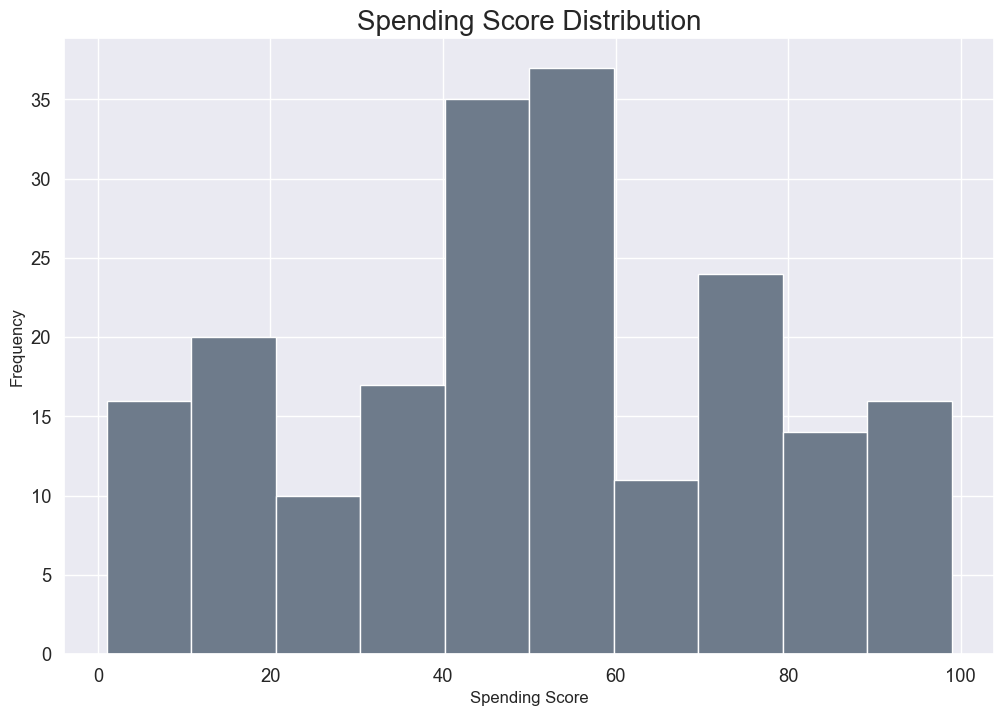

In [67]:
plt.hist(df["Spending Score (1-100)"], color="#6E7B8B")

# Customize the title and axes labels
plt.title("Spending Score Distribution", fontsize=20)
plt.xlabel("Spending Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

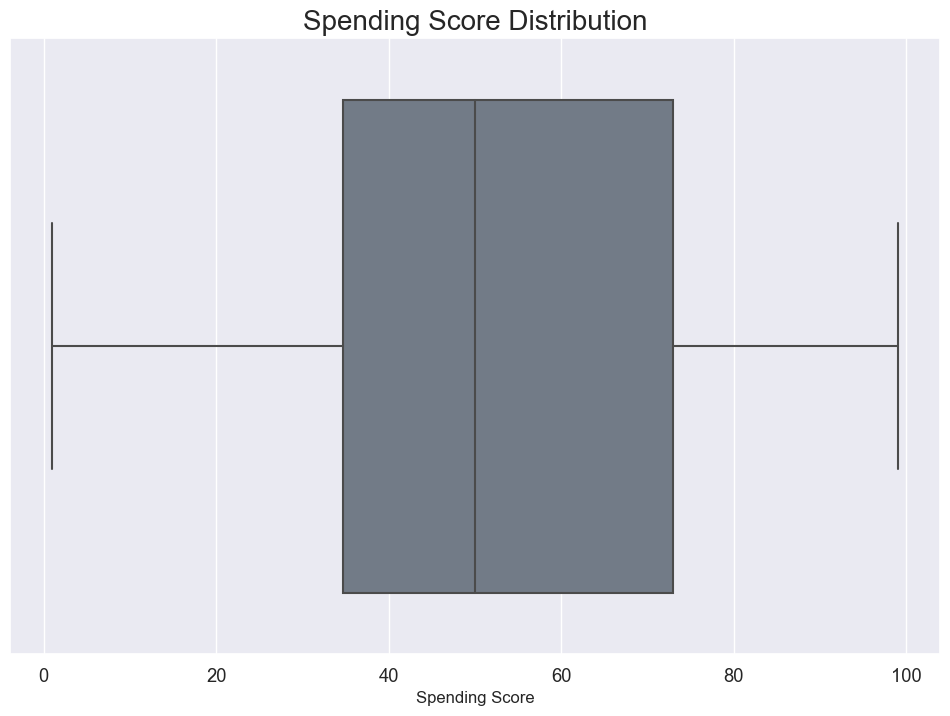

In [68]:
sns.boxplot(data=df, x="Spending Score (1-100)", color="#6E7B8B") ## boxplot to show outliers

# Customize the title and axes labels
plt.title("Spending Score Distribution", fontsize=20)
plt.xlabel("Spending Score", fontsize=12)
plt.show()
plt.show()

**No outliers in Spending score column**

### `3. Bi-variate Analysis & Multi-variate Analysis`

In [69]:
df.columns.tolist()

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [70]:
numerical_columns = df.select_dtypes(include="number").columns.to_list() ## select numerical cols 
categorical_columns = df.select_dtypes(exclude="number").columns.to_list()

print(f"numerical columns in data is : {numerical_columns}")
print("*"*90)
print(f"categorical columns in data is : {categorical_columns}")

numerical columns in data is : ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
******************************************************************************************
categorical columns in data is : ['Gender']


`Correlation between Age and Annual Income and Spending Score.`

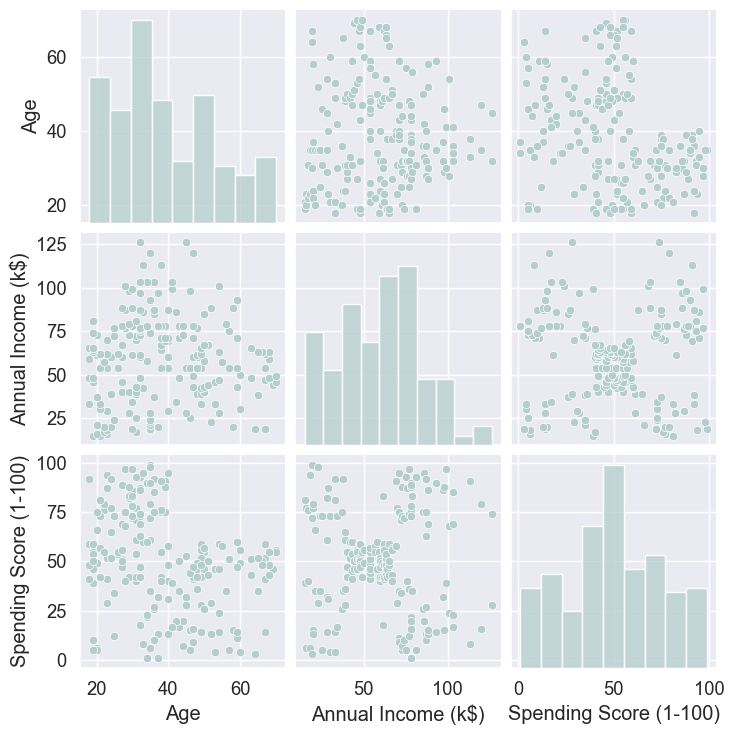

In [71]:
## Customize the colors of the plot
colors = ['#B4CDCD', '#7A8B8B', '#808080']  
sns.set_palette(colors)
sns.pairplot(df)  ## Plot the pairplot 
plt.show()

In [72]:
corr_matrix = round(df[numerical_columns].corr(),2)
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.00,0.00,-0.33
Annual Income (k$),0.00,1.00,0.01
Spending Score (1-100),-0.33,0.01,1.00


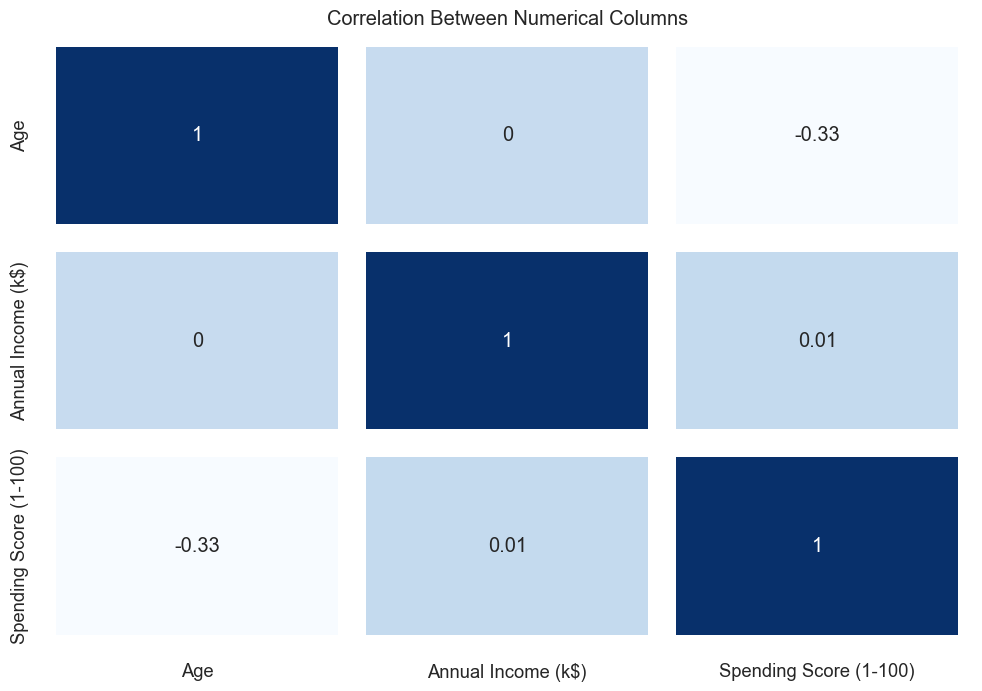

In [73]:
sns.heatmap(corr_matrix, annot=True, cmap="Blues", cbar=False, linewidths=20)
plt.title("Correlation between numerical columns".title())
plt.show()

- **Annual income and age no correlation**
- **between Age and spending negative correlation**
- **Let's show scatter plot between age and spending score**

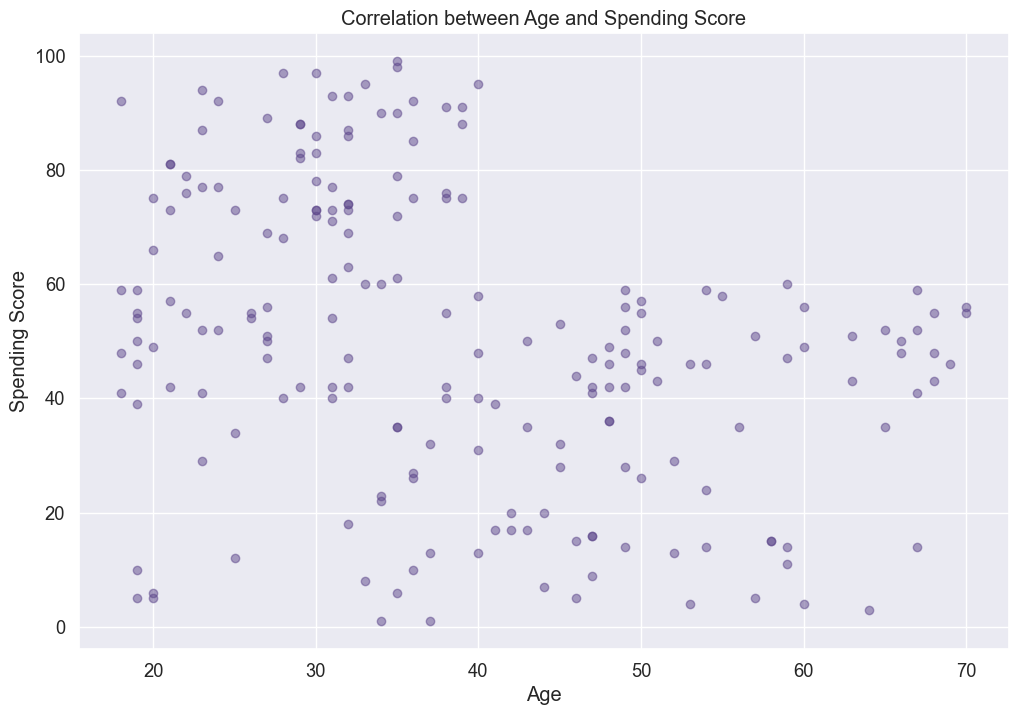

In [74]:
plt.scatter(x=df["Age"], y=df["Spending Score (1-100)"], color='#5D478B', alpha=0.5)
plt.title("Correlation between Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

In [75]:
fig = px.scatter(data_frame=df, x="Age", y="Spending Score (1-100)", color="Gender",
                  color_discrete_sequence=px.colors.qualitative.Safe, 
                  title="<b> Correlation between spending score and age by Gender")
fig.show()

`Gender Vs. Age`

In [76]:
df.groupby("Gender")["Age"].mean()

Gender
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

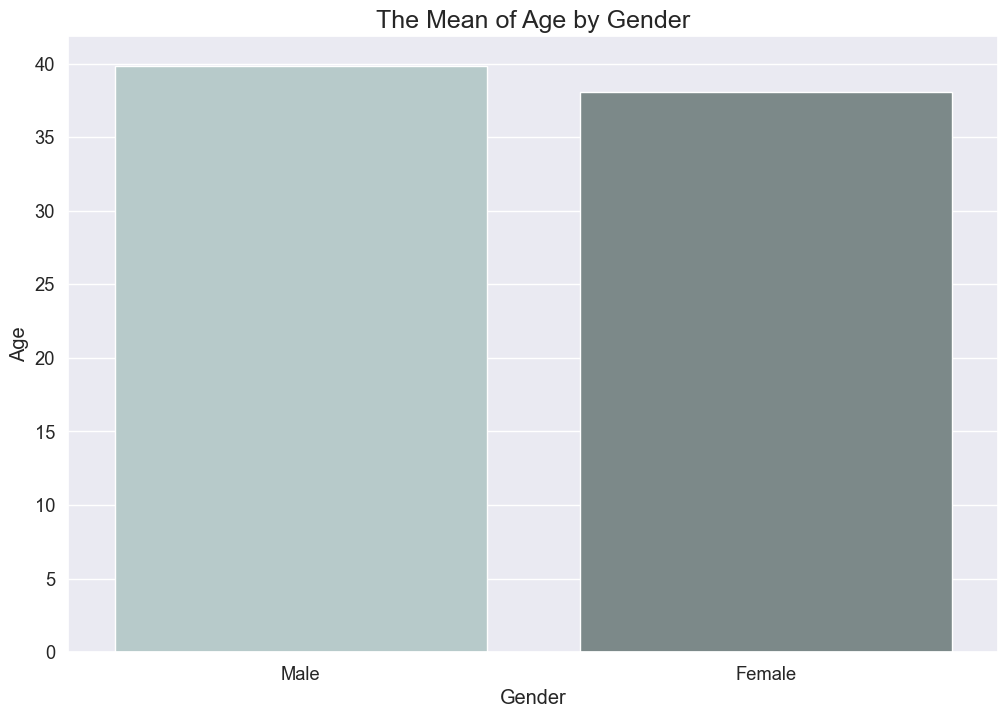

In [77]:
sns.barplot(data=df, x="Gender", y="Age", ci=False, estimator="mean") ## plot bar plot
plt.title("The Mean of Age by Gender", fontsize=18)
plt.show()

`Gender Vs. Annual Income`

In [78]:
df.groupby("Gender")["Annual Income (k$)"].sum()

Gender
Female    6636.0
Male      5325.0
Name: Annual Income (k$), dtype: float64

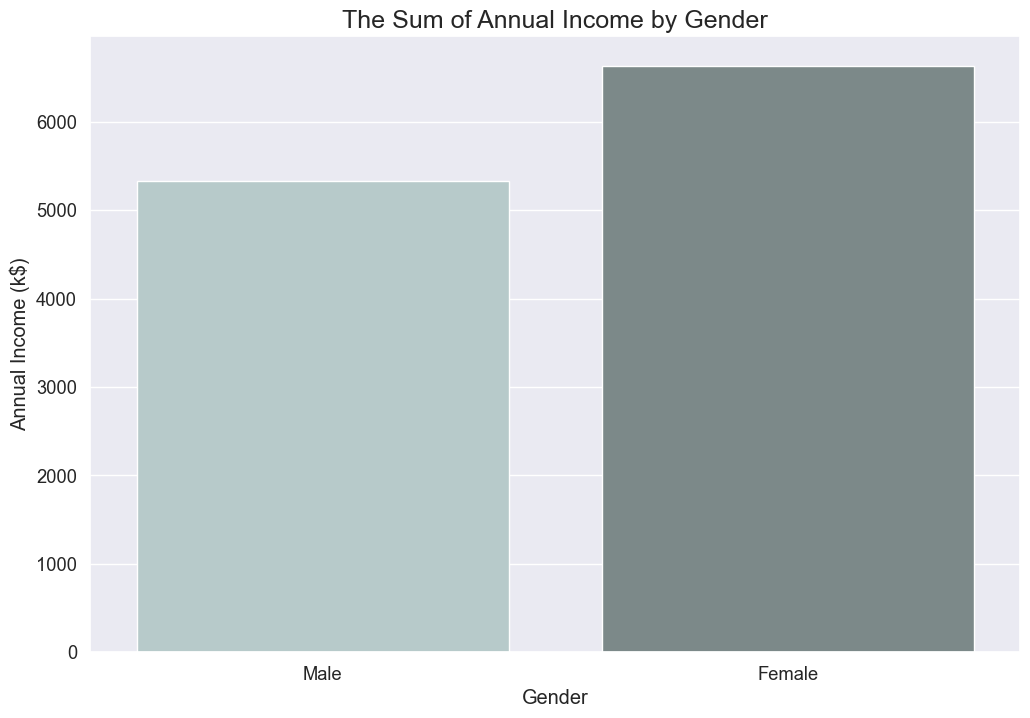

In [79]:
sns.barplot(data=df, x="Gender", y="Annual Income (k$)", ci=False, estimator="sum") ## plot bar plot
plt.title("The Sum of Annual Income by Gender", fontsize=18)
plt.show()

`Spending Score Vs. Age`

In [80]:
df.groupby("Gender")["Spending Score (1-100)"].agg(["min", "max", "sum"])

,min,max,sum
Gender,,,
Female,5,99,5771
Male,1,97,4269


- **spending score of Female is Higher than male**
- **Let's show the histogram**

In [81]:
fig = px.histogram(data_frame=df, x="Spending Score (1-100)", color="Gender",
                color_discrete_sequence=px.colors.qualitative.Bold_r, 
                  title="<b> Spending Score Distribution.")
fig.show()

### `4. Data Preprocessing For ML Model`

#### 4.1 Standardization 

In [82]:
scaler = StandardScaler() ## Create an instance of StandardScaler
scaler.fit(df[numerical_columns]) ## 'numerical_columns' is a list of numerical column names
scaled_data = scaler.transform(df[numerical_columns])# Transform the numerical columns using the scaler
scaled_data = pd.DataFrame(scaled_data, columns=numerical_columns)

In [83]:
scaled_data.sample(3)

,Age,Annual Income (k$),Spending Score (1-100)
149,-0.348068,0.726410,1.545098
150,0.297832,0.726410,-1.288876
2,-1.352802,-1.748853,-1.715913


#### 4.2 Label Encoding 

In [84]:
le = LabelEncoder() ## Create an instance of LabelEncoder
## Fit the encoder
le.fit(df[categorical_columns]) ## 'categorical_columns' is a list of categorical column names
df["Encoded Gender"] = le.transform(df[categorical_columns]) ## # Transform the categorical columns using the encoder

In [85]:
df.drop(columns=["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"], axis=True, inplace=True)

In [86]:
df_final = pd.concat([df, scaled_data], axis=1) ## concat endcodinf column and scaled data
df_final.sample() ## take a sample to see the data

,Encoded Gender,Age,Annual Income (k$),Spending Score (1-100)
161,0,-0.706902,0.766333,1.273347


### `5. Unsupervised Model`

## 5.1 Kmeans Model

In [87]:
tranning_data = df_final[["Annual Income (k$)", "Spending Score (1-100)"]]

In [88]:
kmeans = KMeans(
    n_clusters=2, n_init=10, random_state=42) ## Create instance
kmeans.fit(tranning_data) ## Fit the KMeans model to the data

KMeans(n_clusters=2, n_init=10, random_state=42)

- **The kmeans.inertia_** : attribute in scikit-learn's KMeans class represents the sum of squared distances of samples to their closest cluster center. It is a measure of how well the samples in the dataset are clustered around their respective cluster centroids. 

In [89]:
kmeans.inertia_

267.6535627144873

**See the Labels**

In [90]:
customer_labels = kmeans.labels_
customer_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## *5.1.1 Elbow Method*

In [91]:
# Choose the optimal value of k for elbow method
k_choose = np.arange(2, 12, 1)
k_with_inertia = {}

for k in k_choose:
    each_kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    each_kmeans.fit(tranning_data)
    
    ## Get interia
    k_with_inertia[k] = each_kmeans.inertia_

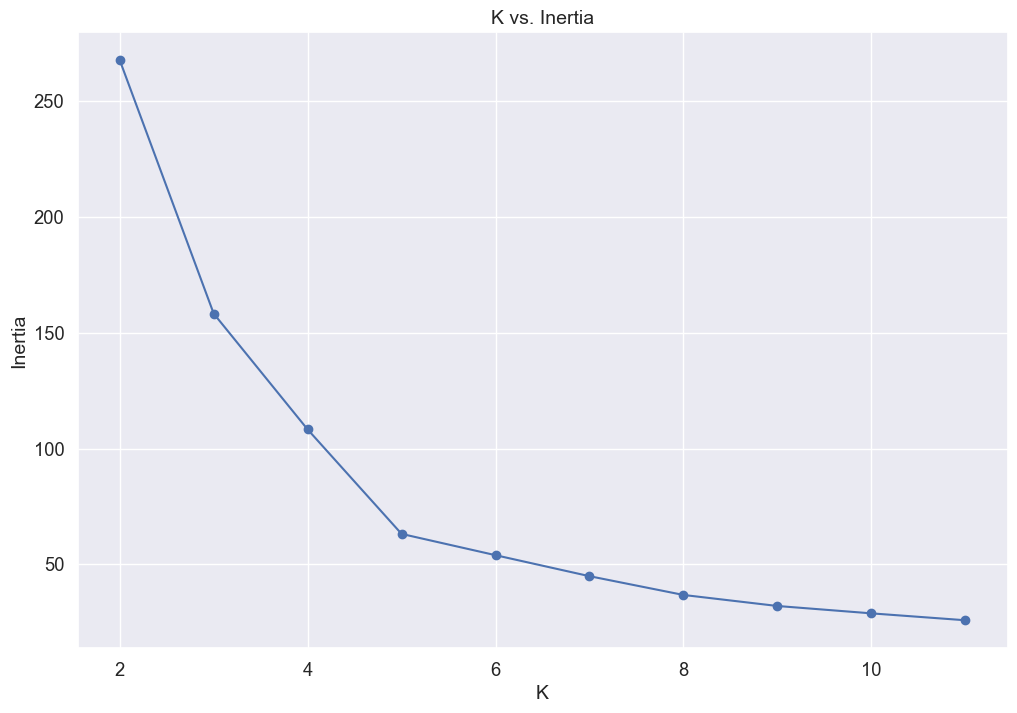

In [92]:
## Draw to get the best value for k 

plt.plot(k_with_inertia.keys(), k_with_inertia.values(), 'bo-')
plt.title('K vs. Inertia', fontsize=14)
plt.xlabel('K', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.show()   ## optimal according to elbow method that k=5

## *5.1.2 Silhouette Score*

In [93]:
## Choose the optimal value of k for silhouete score

k_choose = np.arange(2, 12, 1)

k_with_score = {}
for k in k_choose:
    each_kmeans = KMeans(n_clusters=k, n_init=10, random_state=45)
    each_kmeans.fit(tranning_data)
    
    ## Get score
    k_with_score[k] = silhouette_score(tranning_data, each_kmeans.labels_)

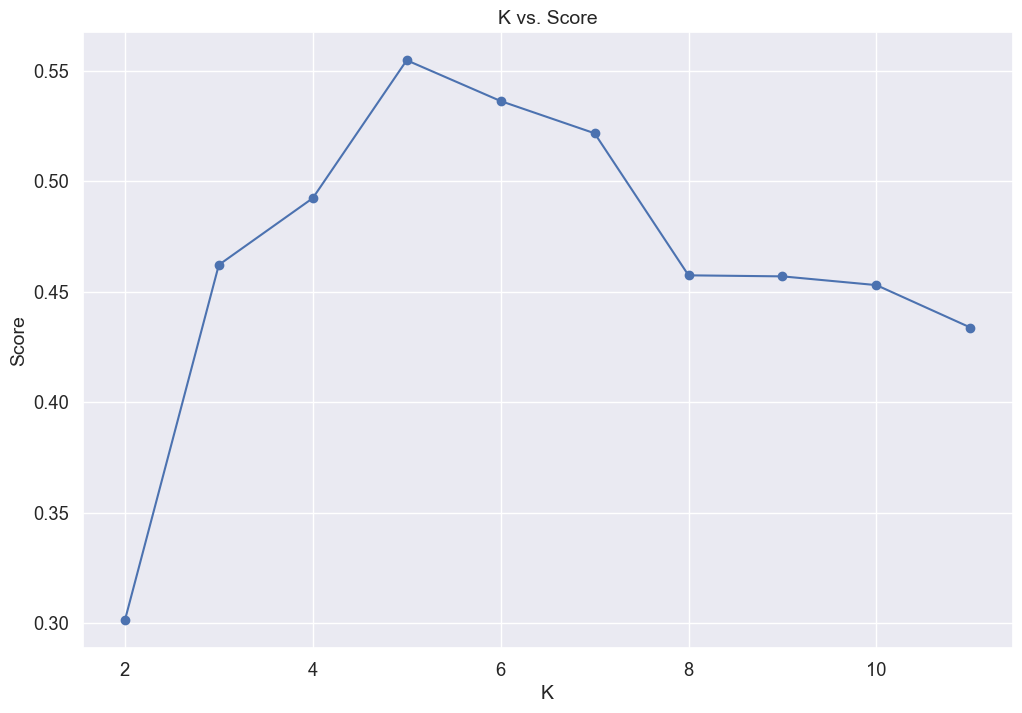

In [94]:
## Draw to get the best value for k 

plt.plot(k_with_score.keys(), k_with_score.values(), 'bo-')
plt.title('K vs. Score', fontsize=14)
plt.xlabel('K', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()   ## optimal according to silhouete score is also 6

- **optimal according to elbow method that k=5**
- **optimal according to silhouete score is also 5**

## 5.1.3  Retrain KMeans Algorithm with Optimal Value of K 

In [95]:
kmeans = KMeans(
    n_clusters=5, n_init=10, random_state=42) ## Create instance
kmeans.fit(tranning_data) ## Fit the KMeans model to the data

KMeans(n_clusters=5, n_init=10, random_state=42)

In [96]:
customer_labels = kmeans.labels_ ## access the cluster assignments for each data point

In [97]:
kmeans.inertia_

63.138175098564076

In [98]:
np.unique(customer_labels) ## 5 cluster

array([0, 1, 2, 3, 4])

In [99]:
cluster_centroids = kmeans.cluster_centers_ ## cluster centroids

In [100]:
df_kmeans = pd.DataFrame(np.c_[tranning_data, customer_labels],
                         columns=tranning_data.columns.tolist()+['cluster_no'])
df_kmeans.head()

,Annual Income (k$),Spending Score (1-100),cluster_no
0,-1.788777,-0.434801,3.0
1,-1.788777,1.195704,1.0
2,-1.748853,-1.715913,3.0
3,-1.748853,1.040418,1.0
4,-1.708930,-0.395980,3.0


## 5.1.4 Visualize Clusters

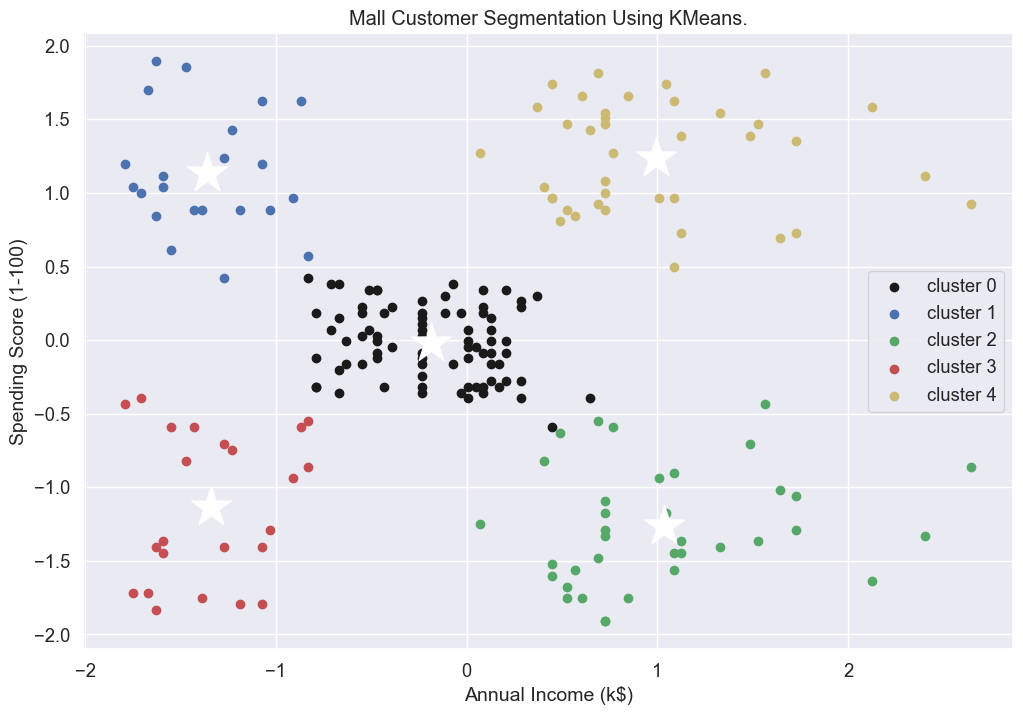

In [101]:
## To visualize using cluster number as a legned
plt.scatter(df_kmeans[df_kmeans['cluster_no']==0]['Annual Income (k$)'],
            df_kmeans[df_kmeans['cluster_no']==0]['Spending Score (1-100)'], c='k', label='cluster 0')
plt.scatter(df_kmeans[df_kmeans['cluster_no']==1]['Annual Income (k$)'],
            df_kmeans[df_kmeans['cluster_no']==1]['Spending Score (1-100)'], c='b', label='cluster 1')
plt.scatter(df_kmeans[df_kmeans['cluster_no']==2]['Annual Income (k$)'],
            df_kmeans[df_kmeans['cluster_no']==2]['Spending Score (1-100)'], c='g', label='cluster 2')
plt.scatter(df_kmeans[df_kmeans['cluster_no']==3]['Annual Income (k$)'],
            df_kmeans[df_kmeans['cluster_no']==3]['Spending Score (1-100)'], c='r', label='cluster 3')
plt.scatter(df_kmeans[df_kmeans['cluster_no']==4]['Annual Income (k$)'],
            df_kmeans[df_kmeans['cluster_no']==4]['Spending Score (1-100)'], c='y', label='cluster 4')

## for centroids
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='*', c='white', s=900)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title("Mall Customer Segmentation Using KMeans.")
plt.legend(loc='best')
plt.show()

## 5.2 Hierarchical clustering
**Agglomerative (bottom-up) approach**

## 5.2.1 Clustering Using Scipy

In [102]:
cluster_scipy = linkage(tranning_data, metric='euclidean', method='ward')

## 5.2.2 Dendrogram
**is a diagram that shows the hierarchical relationship between objects.**

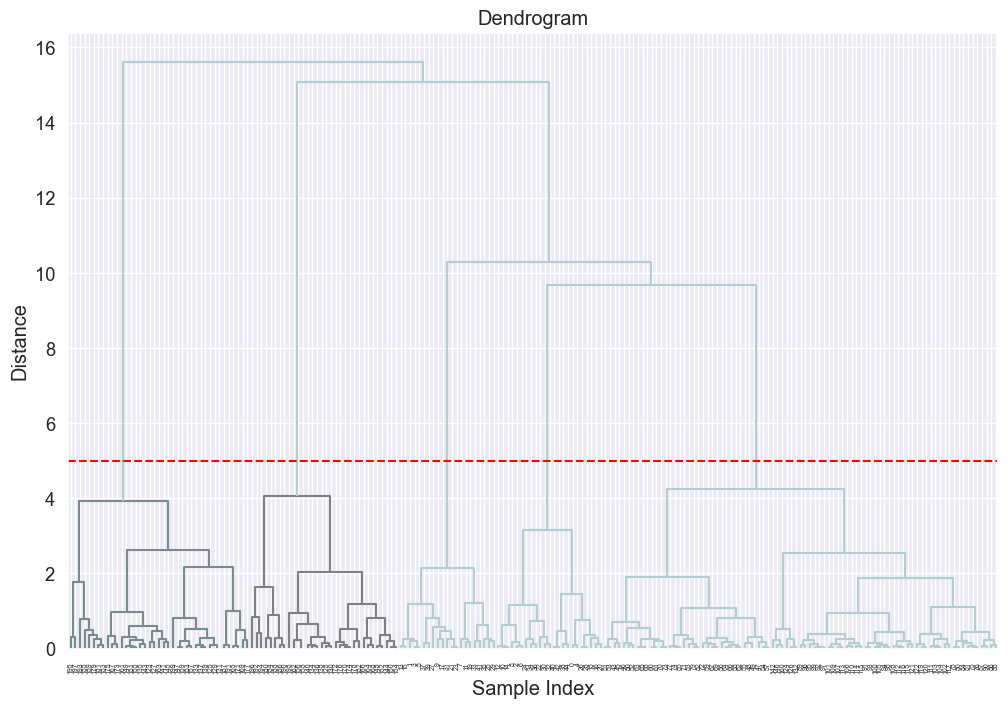

In [104]:
dendrogram(cluster_scipy) ## plot dendrogram
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(5, color='red', linestyle='--')
plt.show()

## 5.2.3 Using Sklearn

In [62]:
## 5 cluster is optimal values
h_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward') ## AgglomerativeClustering object with 5 clusters
clusters = h_cluster.fit_predict(tranning_data) ## Fit the clustering model

In [66]:
cluster_centroids_H = kmeans.cluster_centers_ ## cluster centroids

In [63]:
df_H = pd.DataFrame(np.c_[tranning_data, customer_labels],
                         columns=tranning_data.columns.tolist()+['clusters'])
df_H.sample()

,Annual Income (k$),Spending Score (1-100),clusters
114,0.207403,-0.085407,0.0


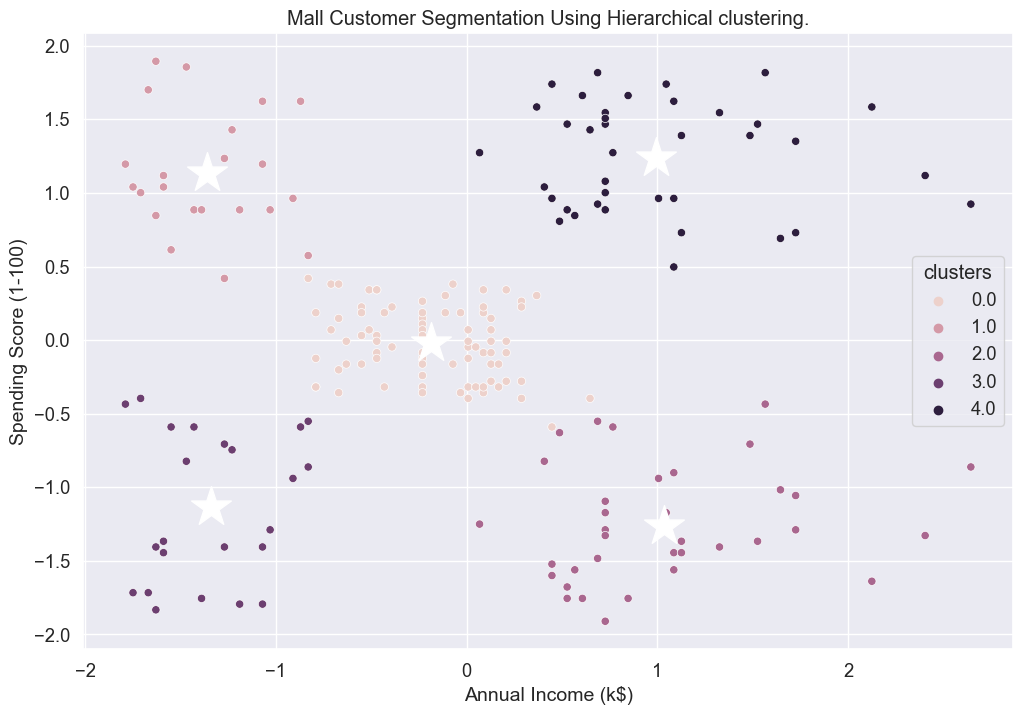

In [77]:
## plot using seaborn
sns.scatterplot(data=df_H, x="Annual Income (k$)", y="Spending Score (1-100)", hue="clusters")

## for centroids 
plt.scatter(cluster_centroids_H[:, 0], cluster_centroids_H[:, 1], marker='*', c='white', s=900)

plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title("Mall Customer Segmentation Using Hierarchical clustering.")
plt.show()

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            font-weight: bold;
            color: white">
<ul>
    If you find the notebook helpful, please give it an upvote. If you have any comments, please let me know, and I'll be happy.
</ul>
</div>